# Get Dataset

1. it subset to Food101 different class of food and 1000 image per class (750 training ,250 testing)
2. Our dataset contain the 3 classes of food and 10% of images.

In [ ]:
import random

import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Downloading the original dataset

In [ ]:
from pathlib import Path

from torchvision import datasets

data_dir = Path("data")

In [ ]:
data_dir

WindowsPath('data')

In [ ]:
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              download=True)
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             download=True)

  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting data\food-101.tar.gz to data


In [ ]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: data
    split=train

In [ ]:
test_data

Dataset Food101
    Number of datapoints: 25250
    Root location: data
    split=test

In [ ]:
class_names = train_data.classes
len(class_names)

101

churros


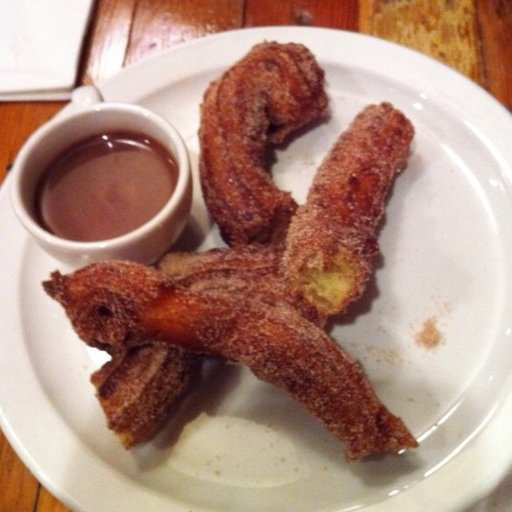

In [ ]:
# view the sample of data
print(class_names[train_data[0][1]])
train_data[0][0]


In [ ]:
food_dir = data_dir / "food-101"
food_dir

WindowsPath('data/food-101')

In [ ]:
import os

for dir_path, dir_names, filenames in os.walk(food_dir):
    print(f"{len(dir_names)} directory and {len(filenames)} files in {dir_path}")

2 directory and 2 files in data\food-101
101 directory and 0 files in data\food-101\images
0 directory and 1000 files in data\food-101\images\apple_pie
0 directory and 1000 files in data\food-101\images\baby_back_ribs
0 directory and 1000 files in data\food-101\images\baklava
0 directory and 1000 files in data\food-101\images\beef_carpaccio
0 directory and 1000 files in data\food-101\images\beef_tartare
0 directory and 1000 files in data\food-101\images\beet_salad
0 directory and 1000 files in data\food-101\images\beignets
0 directory and 1000 files in data\food-101\images\bibimbap
0 directory and 1000 files in data\food-101\images\bread_pudding
0 directory and 1000 files in data\food-101\images\breakfast_burrito
0 directory and 1000 files in data\food-101\images\bruschetta
0 directory and 1000 files in data\food-101\images\caesar_salad
0 directory and 1000 files in data\food-101\images\cannoli
0 directory and 1000 files in data\food-101\images\caprese_salad
0 directory and 1000 files 

In [ ]:
meta_path = Path(r"data\food-101\meta")
meta_path

WindowsPath('data/food-101/meta')

In [ ]:
train_splits = list(meta_path.iterdir())[-1]
train_splits

WindowsPath('data/food-101/meta/train.txt')

In [ ]:
with open(train_splits, "r") as f:
    for name in f:
        print(f.readline())
        break

apple_pie/1014775



In [ ]:
def get_subset(image_path, data_splits, target_classes,
               amount=0.2, seed=None):
    import random
    if seed:
        random.seed(42)
    label_splits = {}
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = image_path / "meta" / f"{data_split}.txt"
        print(label_path)
        with open(label_path, "r") as f:
            file_names = [line.strip('\n') for line in f.readlines() if line.split("/")[0] in target_classes]
        number_to_sample = round(amount * len(file_names))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(file_names, k=number_to_sample)

        # apply full path
        image_paths = [image_path / "images" / f"{str(sample_image)}.jpg" for sample_image in sampled_images]
        label_splits[data_split] = image_paths

    return label_splits


label_splits = get_subset(image_path=food_dir,
                          amount=0.2,
                          data_splits=["train", "test"],
                          target_classes=["pizza", "steak", "sushi"],
                          seed=42)
label_splits["train"][:10]

[INFO] Creating image split for: train...
data\food-101\meta\train.txt
[INFO] Getting random subset of 450 images for train...
[INFO] Creating image split for: test...
data\food-101\meta\test.txt
[INFO] Getting random subset of 150 images for test...


[WindowsPath('data/food-101/images/pizza/3269634.jpg'),
 WindowsPath('data/food-101/images/pizza/1524655.jpg'),
 WindowsPath('data/food-101/images/steak/2825100.jpg'),
 WindowsPath('data/food-101/images/steak/225990.jpg'),
 WindowsPath('data/food-101/images/steak/1839481.jpg'),
 WindowsPath('data/food-101/images/pizza/38349.jpg'),
 WindowsPath('data/food-101/images/pizza/3018077.jpg'),
 WindowsPath('data/food-101/images/sushi/93139.jpg'),
 WindowsPath('data/food-101/images/pizza/2702825.jpg'),
 WindowsPath('data/food-101/images/sushi/200025.jpg')]

# Moving training and testing image to dedicated folder

In [ ]:
# Create target directory path
target_dir_name = f"./data/pizza_steak_sushi_{str(int(0.2 * 100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: './data/pizza_steak_sushi_20_percent'


In [ ]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying data\food-101\images\pizza\3269634.jpg to data\pizza_steak_sushi_20_percent\train\pizza\3269634.jpg...
[INFO] Copying data\food-101\images\pizza\1524655.jpg to data\pizza_steak_sushi_20_percent\train\pizza\1524655.jpg...
[INFO] Copying data\food-101\images\steak\2825100.jpg to data\pizza_steak_sushi_20_percent\train\steak\2825100.jpg...
[INFO] Copying data\food-101\images\steak\225990.jpg to data\pizza_steak_sushi_20_percent\train\steak\225990.jpg...
[INFO] Copying data\food-101\images\steak\1839481.jpg to data\pizza_steak_sushi_20_percent\train\steak\1839481.jpg...
[INFO] Copying data\food-101\images\pizza\38349.jpg to data\pizza_steak_sushi_20_percent\train\pizza\38349.jpg...
[INFO] Copying data\food-101\images\pizza\3018077.jpg to data\pizza_steak_sushi_20_percent\train\pizza\3018077.jpg...
[INFO] Copying data\food-101\images\sushi\93139.jpg to data\pizza_steak_sushi_20_percent\train\sushi\93139.jpg...
[INFO] Copying data\food-101\images\pizza\2702825.jpg to data\pizz

In [ ]:
# Check lengths of directories
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
      dir_path (str): target directory

    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    import os
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(target_dir)

There are 2 directories and 0 images in '\data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in '\data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in '\data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in '\data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in '\data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in '\data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in '\data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in '\data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in '\data\pizza_steak_sushi_20_percent\train\sushi'.


# Zip up images folder to be more easily transported


In [ ]:
target_dir

WindowsPath('data/pizza_steak_sushi_20_percent')

In [ ]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(0.2 * 100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'C:\\Users\\Lenovo\\DataspellProjects\\Pytorch\\data\\pizza_steak_sushi_20_percent.zip'

# Downloading from github

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

# Becoming one with data

In [ ]:
from pathlib import Path

In [ ]:
image_path = Path("data/pizza_steak_sushi")
image_path

In [ ]:
import os


def walk_through_dir(dir_path):
    for dirpath, dir_names, filenames in os.walk(dir_path):
        print(f"There are {len(dir_names)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

In [ ]:
# set the train and test path
train_path = image_path / "train"
test_path = image_path / "test"
train_path, test_path

## Visual the image

1. Get all images path
2. get random image path
3. get image class name
4. print some meta data
5. show the image

In [ ]:
image_path

In [ ]:
import random
from PIL import Image


def visual_image(image_path, seed=None):
    if seed:
        random.seed(seed)
    # 1. get all the images path
    image_path_list = list(image_path.glob("*/*/*.jpg"))

    # get the random image
    random_img_path = random.choice(image_path_list)
    print(type(random_img_path))
    # get the image class name
    class_name = random_img_path.parent.stem

    img = Image.open(random_img_path)
    print(f"Random Image path : {random_img_path}")
    print(f"Image class : {class_name}")
    print(f"Image height : {img.height}")
    print(f"Image width : {img.width}")
    print(f"Image Channel : {img.getbands()}")

    display(img)
    return img

In [ ]:
img = visual_image(image_path)

## Visual using the Matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def visual_using_matplotlib(image_path, k=9, seed=None):
    if seed:
        random.seed(seed)
    # getting all image path
    all_image_paths = list(image_path.glob("*/*/*.jpg"))
    # selecting random k image_path
    random_k_image_path = random.sample(all_image_paths, k=k)

    for plt_idx, img_path in enumerate(random_k_image_path, start=1):
        img = Image.open(img_path)
        class_name = img_path.parent.stem
        img_as_array = np.asarray(img)
        ax = plt.subplot(3, 3, plt_idx)
        ax.imshow(img_as_array)
        ax.set_title(f"{class_name} | {img_as_array.shape}")
        ax.axis("off")
    plt.tight_layout()

In [ ]:
visual_using_matplotlib(image_path)

# Transforming data

Before we can use out image data with pytorch:
1. Turn your target data into tensor.
2. Turn it into a `torch.util.data.Dataset` and we changed into `torch.utils.data.DataLoader`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Transforming data with torchvision.transforms

In [ ]:
# write the transform using compose
data_transform = transforms.Compose([
    # Resize the image
    transforms.Resize(size=(64, 64)),
    # Flip the image
    transforms.RandomHorizontalFlip(p=0.5),
    # convert the data into tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape
#? torch transform the data c,h,w

In [ ]:
def visual_transformed_image(image_path, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    #. get all the image path
    all_image_path = list(image_path.glob("*/*/*.jpg"))
    random_image_paths = random.sample(all_image_path, k=n)
    for img_path in random_image_paths:
        with Image.open(img_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize : {f.size}")
            ax[0].axis("off")

            transformed_img = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed\nSize : {list(transformed_img.shape)}")
            ax[1].axis("off")

            fig.suptitle(f"Class : {img_path.parent.stem}", fontsize=16)
    plt.tight_layout()

In [ ]:
visual_transformed_image(image_path, data_transform)

## Loading Image using the `ImageFolder`

we can load image using `torchvision.datasets.ImageFolder`

In [ ]:
from torchvision import datasets

In [ ]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=data_transform,
                                 target_transform=None)

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
dir(train_data)

In [ ]:
class_names = train_data.classes
class_names

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

In [ ]:
len(train_data)

In [ ]:
img, label = train_data[0]
img.shape

In [ ]:
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.show()


## Turn the dataset into dataloader

DataLoader turn the dataset into iterable,basically creating the batch.

In [ ]:
os.cpu_count()

In [ ]:
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=8, shuffle=True,
                               num_workers=os.cpu_count())
test_data_loader = DataLoader(dataset=test_data,
                              batch_size=8, shuffle=False,
                              num_workers=os.cpu_count())

In [ ]:
img, label = next(iter(train_data_loader))
img.shape

In [ ]:
len(train_data_loader)

# Loading Image data with a Custom `Dataset`

1. Want to be able to load image from file,
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

## Creating the helper function get the class names

Want to function to:
1. get the class name using `os.scandir` and traverse the dir and get all the class name that stored in image classification format.
2. return the list of class names and dict with class name and idx . this same as the `ImageFolder`.


In [ ]:
# set path for target directory
target_directory = train_path
target_directory

In [ ]:
sorted([entry.name for entry in os.scandir(target_directory)])

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Find the class name by scanning the target directory"""
    # 1. Get teh class name
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # 2. Raise the error if no class names
    if not classes:
        raise FileNotFoundError(f"Could not find any classes in {directory}...")
    #3. create the dict
    class_to_idx = {k: v for v, k in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(target_directory)

## Create the custom dataset replicate the ImageFolder

1. Subclass the  `torch.utils.data.Dataset`
2. Init our subclass with a target directory as well a transform.
3. Create several attributes
    * paths - paths of our image
    * transform - the transform we like to use
    * classes - a list of target classes
    * class_to_idx -  a dict of the target classes mapped to integer labels
4. Create a function to `load_images()` ,this will open an image.
5. Overwrite the `__len__` method to return the length of out dataset.
6. Overwrite the `__getitem__` method to given sample when passed an index.

In [ ]:
# 1. Subclass the "torch.utils.data.Dataset"
class ImageFolderCustom(torch.utils.data.Dataset):
    # 2. Init our subclass with target dir and as well as transformer
    def __init__(self, targ_dir, transform=None):
        self.target_dir = targ_dir
        self.transform = transform
        # get the all the path in the directory
        self.paths = list(pathlib.Path(self.target_dir).glob("*/*.jpg"))
        self.classes, self.class_to_idx = self.find_classes(self.target_dir)

    def find_classes(self, targ_dir):
        # 1. get the class name by scanning the target directory
        classes = sorted(entry.name for entry in os.scandir(targ_dir) if entry.is_dir())

        # raise error if file not found
        if not classes:
            raise FileNotFoundError("Cannot find the folder")
        classes_to_idx = {k: v for v, k in enumerate(classes)}
        return classes, classes_to_idx

    # 4. Create the function to load image
    def load_image(self, index: int) -> Image.Image:
        """Open an image via a path and returns it."""
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__
    def __len__(self):
        return len(self.paths)

    # 6.overwrite __getitem__ to return the particular image
    def __getitem__(self, item) -> Tuple[torch.Tensor, int]:
        img = self.load_image(item)
        class_name = self.paths[item].parent.stem
        class_idx = self.class_to_idx[class_name]

        # if Transform
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

## Compare the Custom Dataset with Original Dataset

In [ ]:
# create the transformer
train_transformers = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=.5),
    transforms.ToTensor()
])

test_transformers = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_path,
                                      transform=train_transformers)

test_data_custom = ImageFolderCustom(targ_dir=test_path,
                                     transform=test_transformers)

In [ ]:
len(train_data) == len(train_data_custom)

In [ ]:
len(test_data) == len(test_data_custom)

In [ ]:
train_data_custom.classes == train_data.classes

In [ ]:
train_data.class_to_idx == train_data_custom.class_to_idx

## Create a function to display random images

What we need:
1. Take the `Dataset`,number image to display
2. select the random idx
3. Loop through the random idx and display image.
4. don't forget to change the shape of the image.Since tensor has shape [CHW] ,but matplotlib take [HWC].

In [ ]:
def display_rand_image(dataset: torch.utils.data.Dataset,
                       n: int = 10,
                       classes: List[str] = None,
                       display_shape=True,
                       seed: int = None):
    random_sample_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))
    for plt_idx, sample_idx in enumerate(random_sample_idx, start=1):
        img, label = dataset[sample_idx]
        if isinstance(img, torch.Tensor):
            img = img.permute(1, 2, 0)
        plt.subplot(1, n, plt_idx)
        plt.imshow(img)
        plt.axis("off")
        if classes:
            title = f"Class:{classes[label]}"
            if display_shape:
                title += f"\nShape:{list(img.shape)}"
        plt.title(title)
    plt.tight_layout()

In [ ]:
display_rand_image(train_data, n=10, classes=train_data.classes)

In [ ]:
display_rand_image(train_data_custom, n=10, classes=train_data_custom.classes)

# Other form of data transform (Data Augmentation):

Looking at the same image but form different perspective . To artificially to create the increase the diversity in the images.

This make the model more generalise to unseen data.

In [ ]:
# Let use the TrivialAugment
train_transformers = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

In [ ]:
visual_transformed_image(image_path, train_transformers)

# Model 0 : TinyVGG without Augmentation

Let's replicate the TinyVGG in CNN Explainer

In [ ]:
import os
from pathlib import Path


import torch
from torchvision import datasets,transforms

from torch.nn.modules.loss import _Loss
from torch import nn

try:
    import torchmetrics
except ModuleNotFoundError:
    !pip install torchmetrics

# Metric
from torchmetrics import Metric
from torchmetrics import Accuracy

## Set up the device-agnostic

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

## Creating the transformer and loading Data

In [ ]:
# create the simple transformer
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_dir = Path("data/pizza_steak_sushi/train")
test_dir = Path("data/pizza_steak_sushi/test")

In [ ]:
# Load and transform the data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                  transform=simple_transform,
                                  target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                 transform=simple_transform,
                                 target_transform=None)

In [ ]:
class_names = train_data_simple.classes
class_names

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create the dataloader
train_data_loader_simple = torch.utils.data.DataLoader(dataset=train_data_simple,
                                                shuffle=True, batch_size=BATCH_SIZE,
                                                num_workers=NUM_WORKERS)

test_data_loader_simple = torch.utils.data.DataLoader(dataset=test_data_simple,
                                               shuffle=False,batch_size=BATCH_SIZE,
                                               num_workers=NUM_WORKERS)

## Creating the Model

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture replicate TinyVGG from CNN Explainer
    """
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=0,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=0,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=0,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

## Try a forward pass on a single image (to test the model)

In [ ]:
image_batch , label_batch = next(iter(train_data_loader))
image_batch.shape ,label_batch.shape

In [ ]:
model_0(image_batch.to(device)).shape

## Use the torchinfo get the shape

In [ ]:
try:
    import torchinfo
except ModuleNotFoundError:
    !pip install torchinfo
    import torchinfo

In [ ]:
torchinfo.summary(model_0,input_size=[BATCH_SIZE,3,64,64])

## Training and test step

In [ ]:
def train_step(model:nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:_Loss,
               optimizer:torch.optim.Optimizer,
               metric_fn:Metric,
               device:torch.device=device):
    ### Training step
    train_loss = train_acc = 0

    model.train()
    # 1. Loop through each batch
    for X_train,y_train in dataloader:
        # put the data into device
        X_train,y_train = X_train.to(device),y_train.to(device)
        # 2. Forward pass and predict
        y_logits = model(X_train)
        y_probs = torch.softmax(y_logits,dim=1)
        #3. calculate the loss
        loss = loss_fn(y_logits,y_train)
        train_loss += loss
        train_acc += metric_fn(y_probs,y_train)

        # 4. set optimizer to zero grad
        optimizer.zero_grad()
        # 5. back propagate the loss
        loss.backward()
        # 6.  update weight using the step
        optimizer.step()

    # average the training loss and training accuracy
    train_loss_avg = (train_loss / len(dataloader)).item()
    train_acc_avg = (train_acc / len(dataloader)).item()

    
    return train_loss_avg,train_acc_avg

In [ ]:
def test_step(model:nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn: _Loss,
              metric_fn:Metric,
              device:torch.device=device):
    #### Testing step
    model.eval()
    test_loss = test_acc = 0
    with torch.inference_mode():
        for X_test,y_test in dataloader:
            # put the dat into device:
            X_test,y_test = X_test.to(device),y_test.to(device)

            # 1. Forward pass
            y_logits = model(X_test)
            y_probs = torch.softmax(y_logits,dim=1)

            # 2. compute the loss
            loss = loss_fn(y_logits,y_test)
            test_loss += loss
            test_acc  +=  metric_fn(y_probs,y_test)

    test_loss_avg = (test_loss / len(dataloader)).item()
    test_acc_avg = (test_acc / len(dataloader)).item()

    
    return test_loss_avg,test_acc_avg

## Create a `train()` that combine the `train_step()` and `test_step`

In [ ]:
from tqdm.auto import tqdm
from collections import defaultdict

def train(model:nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:_Loss,
          optimizer:torch.optim.Optimizer,
          metric_fn:Metric,
          epochs:int=5,
          device:torch.device=device):
    history = defaultdict(list)

    for epoch in tqdm(range(1,epochs+1)):
        
        train_loss,train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          metric_fn=metric_fn,
                                          device=device)
        test_loss,test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn,
                                       metric_fn=metric_fn,
                                       device=device)
        # prints what happening
        if epoch%10 == 0 or epoch==1:
            print(f"Epoch : {epoch}\n---------------------")
            print(f"\tAverage Training Loss :{train_loss:.6f} | Average Training Acc : {train_acc:.2%}")
            print(f"\t Average Testing loss : {test_loss:.6f} | Average Testing Acc : {test_acc:.2%}")

        # update the metric
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)

    return history

## Train and evaluate model 0

In [ ]:
# set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
NUM_EPOCHS = 100

# instantiate model
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

# set loss,optimise ,metric
cross_entropy_loss_fn = nn.CrossEntropyLoss()
adam_optimizer = torch.optim.Adam(params=model_0.parameters(),
                                lr=0.001)
accuracy_fn = Accuracy(task="multiclass",
                       num_classes=len(class_names)).to(device)

# start the timer
from timeit  import default_timer as timer
start_time = timer()

# Train the model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader=test_data_loader_simple,
                        optimizer=adam_optimizer,
                        loss_fn=cross_entropy_loss_fn,
                        metric_fn=accuracy_fn,
                        device=device,
                        epochs=NUM_EPOCHS)

# end the timer
end_time = timer()
print(f"Total training time : {end_time-start_time:.3f} seconds")

## Plotting the loss curve

In [ ]:
def plot_loss_curve(history_:Dict[str, List[float]]):
    epochs_range = range(len(history_["train_loss"]))

    plt.figure(figsize=(8,3))

    # Plot the loss
    plt.subplot(121)
    plt.plot(epochs_range,history_["train_loss"],label="Training")
    plt.plot(epochs_range,history_["test_loss"],label="Testing")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot the loss
    plt.subplot(122)
    plt.plot(epochs_range,history_["train_acc"],label="Training")
    plt.plot(epochs_range,history_["test_acc"],label="Testing")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()

In [ ]:
plot_loss_curve(model_0_results)

# Model 1 : TinyVGG with Data Augmentation

Same model but the data is transformed with TRIVIAL AUGMENTATION.

## Creating training transform with TrivialAugmentation

In [ ]:
##  create training transform with TrivialAugmentation
from torchvision import transforms
train_transformers_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
# No Transformation on done on the testing dataset
test_transformers_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

## Creating the Dataset and DataTransformer

In [ ]:
import os
from pathlib import Path

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


# setting the path
train_dir = Path("data/pizza_steak_sushi/train")
test_dir = Path("data/pizza_steak_sushi/test")

# creating the dataset
train_data_augment = ImageFolder(root=train_dir,
                                 transform=train_transformers_trivial,
                                 target_transform=None)

test_data_simple = ImageFolder(root=test_dir,
                               transform=test_transformers_simple,
                               target_transform=None)

#Setting the parameter
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# Creating the dataloader
train_data_loader_augment = DataLoader(dataset=train_data_augment,
                                       shuffle=True,batch_size=BATCH_SIZE,
                                       num_workers=NUM_WORKERS)

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                                     shuffle=False,batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS)

## Construct the model

Same model architecture but with data augment

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augment.classes)).to(device)
model_1

## Pick the loss ,optimiser and metric

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of Epochs
NUM_EPOCHS = 100

cross_entropy_loss_fn = nn.CrossEntropyLoss()
adam_optimizer = torch.optim.Adam(params=model_1.parameters(),
                                  lr=0.001)
accuracy_fn = Accuracy(task="multiclass",num_classes=len(train_data_augment.classes)).to(device)

## Train the model

In [ ]:
from timeit import default_timer as timer

start_time = timer()

# train the model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_data_loader_augment,
                        test_dataloader=test_data_loader_simple,
                        loss_fn=cross_entropy_loss_fn,
                        optimizer=adam_optimizer,
                        metric_fn=accuracy_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total Training Time : {end_time - start_time}")

## Train the model

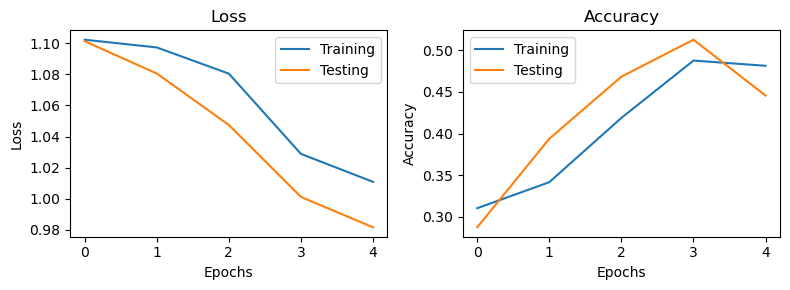

In [93]:
from timeit import default_timer as timer

start_time = timer()

# train the model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_data_loader_augment,
                        test_dataloader=test_data_loader_simple,
                        loss_fn=cross_entropy_loss_fn,
                        optimizer=adam_optimizer,
                        metric_fn=accuracy_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()
print(f"Total Training Time : {end_time - start_time}")

## Loading the custom image with Pytorch

We need to convert the custom image that our model is trained on.
1. In tensor form with datatype(torch.float32)
2. of shape 64x64x3
3. on the right device

In [97]:
import requests
from pathlib import Path

img_url = "https://img.freepik.com/free-photo/top-view-pepperoni-pizza-sliced-into-six-slices_141793-2157.jpg?w=2000"

custom_image_dir= Path("data/custom")
if not custom_image_dir.is_dir():
    print(f"Creating the directory to store the custom image...")
    custom_image_dir.mkdir(parents=True,exist_ok=True)

print(f"Downloading the custom image...")
custom_image_path = custom_image_dir / img_url.split("/")[-1].split("?")[0]
with open(custom_image_path,"wb") as f:
    request = requests.get(img_url)
    print("Saving the image into custom path")
    f.write(request.content)

Creating the directory to store the custom image...
Saving the image into custom path


### Read the image using the `torchvision.io.read_image()`

1. take the path as input and return tensor of dtype `unit8`.

In [99]:
import torchvision

# read custom image using the io
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"Shape of Custom image : {custom_image_unit8.shape}")
print(f"Datatype of Custom Image : {custom_image_unit8.dtype}")

Shape of Custom image : torch.Size([3, 1333, 2000])
Datatype of Custom Image : torch.uint8


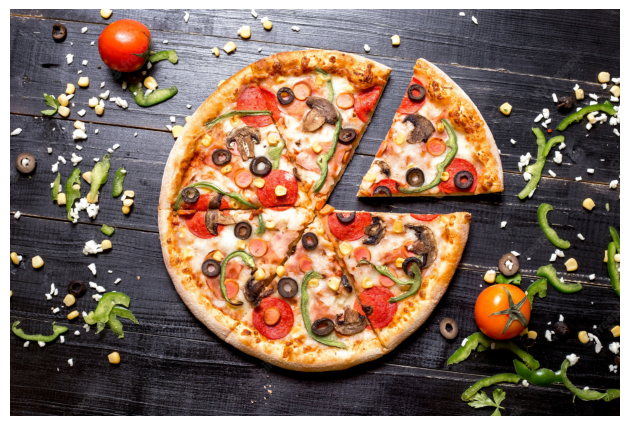

In [105]:
plt.imshow(custom_image_unit8.permute(1,2,0))
plt.axis("off")
plt.tight_layout()
plt.show()

## Making the prediction on custom image

Predicting on your own custom data with a trained model is possible, as long as you format the data into a similar format to what the model was trained on. Make sure you take care of the three big PyTorch and deep learning errors:
1. Wrong datatypes - Your model expected torch.float32 when your data is torch.uint8.
2. Wrong data shapes - Your model expected [batch_size, color_channels, height, width] when your data is [color_channels, height, width].
3. Wrong devices - Your model is on the GPU but your data is on the CPU.


### Problem with dtype

In [114]:
import sys
import traceback

try:
    model_1.eval()
    with torch.inference_mode():
        model_1(custom_image_unit8.to(device))
except RuntimeError as err:
    print(err)
    traceback.print_exc()
    # print(traceback.print_tb(sys.exc_info()[-1]))

Input type (unsigned char) and bias type (float) should be the same


Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\2033614792.py", line 7, in <module>
    model_1(custom_image_unit8.to(device))
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\3141728342.py", line 47, in forward
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\container.py", line 204, in forward
    input = module(input)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\conv.py", line 463, 

### Problem with shape

In [118]:
# normalize the image
custom_image_float32 = custom_image_unit8.type(torch.float) / 255.
custom_image_float32.shape

torch.Size([3, 1333, 2000])

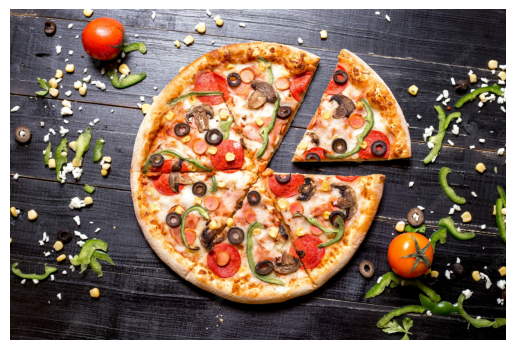

In [120]:
plt.imshow(custom_image_float32.permute(1,2,0))
plt.axis("off")
plt.show()

In [119]:
try:
    model_1.eval()
    with torch.inference_mode():
        model_1(custom_image_float32.to(device))
except RuntimeError as err:
    print(err)
    traceback.print_exc()

mat1 and mat2 shapes cannot be multiplied (10x164010 and 1690x3)


Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\1088665051.py", line 4, in <module>
    model_1(custom_image_float32.to(device))
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\3141728342.py", line 47, in forward
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\container.py", line 204, in forward
    input = module(input)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\linear.py", line 1

### Create the custom transform for custom image


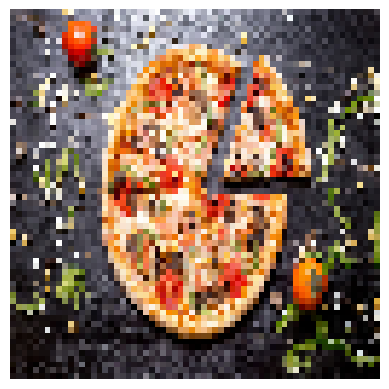

In [122]:
from torchvision import transforms
custom_image_transformer = transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_image_transformed = custom_image_transformer(custom_image_float32)

plt.imshow(custom_image_transformed.permute(1,2,0))
plt.axis("off")
plt.show()

### Problem with batch size

In [125]:
try:
    model_1.eval()
    with torch.inference_mode():
        model_1(custom_image_transformed)
except RuntimeError as err:
    print(err)
    traceback.print_exc()

mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)


Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\2910921210.py", line 4, in <module>
    model_1(custom_image_transformed)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18156\3141728342.py", line 47, in forward
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\container.py", line 204, in forward
    input = module(input)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\torch\nn\modules\linear.py", line 114, in 

### Prediction on custom image


In [132]:
custom_image_transformed_with_batch = custom_image_transformed.unsqueeze(dim=0)
model_1.eval()
with torch.inference_mode():
    custom_image_logits = model_1(custom_image_transformed_with_batch.to(device))
print(custom_image_logits)

tensor([[ 0.2502, -1.5948,  0.9140]])


In [134]:
#? convert the logit -> prediction probability
custom_image_pred_probs = torch.softmax(custom_image_logits,dim=1)
custom_image_pred_probs

tensor([[0.3226, 0.0510, 0.6265]])

In [135]:
#? convert the prediction probability -> prediction label
custom_image_labels = torch.argmax(custom_image_pred_probs,dim=1)
custom_image_labels

tensor([2])

In [136]:
class_names[custom_image_labels]

'sushi'

## Creating Function for Prediction on custom image

Task:
A function when we pass ah image path to and have otu model predict on th image and plot image + prediction.

In [181]:
def predict_on_custom_image(model:nn.Module,
                            image_path:str,
                            class_names:List[str] = None,
                            transform = None,
                            device = device):

    # laod the image
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float)

    # normalize the image
    target_image = target_image /255.

    # transforms if necessary
    if transform:
        target_image = transform(target_image)

    model_1.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)

        # make the prediction
        target_image_logit = model(target_image.to(device))
    # convert logit -> prob
    target_image_pred_probs = torch.softmax(target_image_logit,dim=1)

    # convert prob -> label
    target_image_pred_label = torch.argmax(target_image_pred_probs,dim=1)

    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
        title = f"Pred : {class_names[target_image_pred_label.cpu()]} | Prob : {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred : {target_image_pred_label.cpu()} | Prob : {target_image_pred_probs.max().cpu():.3f}"

    plt.title(title)
    plt.axis("off")


torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


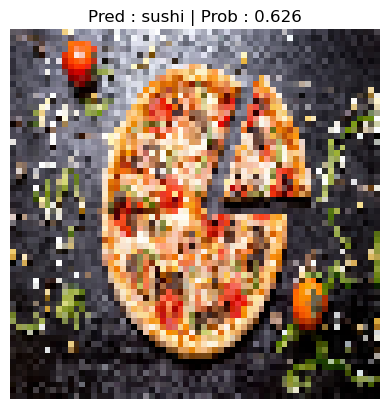

In [182]:
predict_on_custom_image(model=model_1,
                        image_path=custom_image_path,
                        class_names=class_names,
                        transform=custom_image_transformer,
                        device=device)

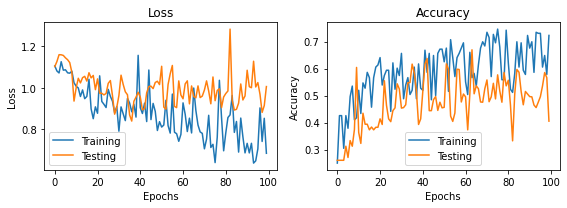

In [90]:
plot_loss_curve(model_1_results)